# Deep learning the MNIST Database

We take the MNIST example from the fantastic book "Deep Learning with Python and Keras" by Francois Chollet. Code is available on his github[^1] repository.

[^1]: See here `github.com/fchollet/deep-learning-with-python-notebooks`

Remember to install the modules we require, e.g. by
`pip3 install keras`


In [1]:
# Wir importieren zunächst den MNIST Datensatz

from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels ) = mnist.load_data()


/Users/ts/synchronized/bitbucket/ml_lectures_1/01_lecture_ws_2020/python_source/.venv/lib/python3.8/site-packages/pandas/compat/__init__.py:120: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


Our supervised training data is now stored in `train_images` and `train_labels` and in addition we have a test dataset. Lets have a look at the data.

In [2]:
# show the shape of the dataset 
print("shape of training images  :", train_images.shape)
print("length of training labels :", len(train_labels))
print("training labels           :", train_labels)
print("\nand length of test data   :", len(test_labels))

shape of training images  : (60000, 28, 28)
length of training labels : 60000
training labels           : [5 0 4 ... 5 6 8]

and length of test data   : 10000


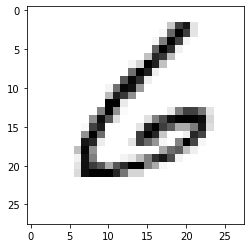

In [7]:
# let us visualize the data
digit = train_images[59998] # number 4 is a ... 9, probably :)
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

Now we fire up the neural network. It will be a feedforward neural network, which is called `Sequential`.
The activation functions will be RELU and SOFTMAX (please look this up). A dense layer is a layer which we have met in the lectures, all neurons are connected to all neurons.

From the structure dataset we see that the input layer is of length 28*28

In [8]:
from keras import models
from keras import layers

# feedforward neural network
network = models.Sequential()

# a Dense layer with 512 neurons. 
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

# now we specify the optimizer and the loss function.
# metrics give the values which are monitored during the training
network.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

Before being able to train the network, we must reshape the data in a form that suits our network. 
The main goal here is to obtain an array of size `[60000, 28*28]` and to normalize the values (which are in 0...255) to `[0,1]` by dividing with 255.

In [9]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255 

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255 

Also the labels have to brought into a desired fromat.

In [10]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [12]:
# Train the NN
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0280 - accuracy: 0.9920
Epoch 2/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0216 - accuracy: 0.9936
Epoch 3/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0166 - accuracy: 0.9952
Epoch 4/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0124 - accuracy: 0.9963
Epoch 5/5
469/469 [==============================] - 2s 4ms/step - loss: 0.0099 - accuracy: 0.9971


**YES!** Thats it. We trained the network. cool.

What did we achieve ? An accuracy of 98.85% on the training data. Not bad for our first try. Can we improve ? OF COURSE (but not now - try yourself!)

### How do we generalize? ie how do we perform on the test data?

In [13]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print ("test data correctly classified: ", test_acc)

313/313 [==============================] - 0s 607us/step - loss: 0.0795 - accuracy: 0.9793
test data correctly classified:  0.9793000221252441


Nice. We achieved 97.91% on the test data. Now start trying to understand all the steps of the program.